# This is the demo to apply our AutoML system to AdultDataset

## dataset_metric you can select and their ranges
'mean_difference': [-1,1] close to 0 <br>
'statistical_parity_difference': [-1,1] close to 0 <br>
'disparate_impact': > 0  The larger the better<br>
'consistency': [0, 1]: The larger the better

## classifier_metric (optimal range)
"Statistical parity difference" : [-0.1, 0.1]<br>
"Mean difference": [-0.1, 0.1] <br>
"Disparate impact": [0.8,1.2] <br>
"Average odds difference" [-0.1, 0.1] <br>
"Equal opportunity difference" [-0.1, 0.1] <br>
"Theil index": [0, 0.2]

In [11]:
import warnings
warnings.filterwarnings('ignore')

import AutoML
import pandas as pd
import numpy as np
from importlib import reload
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('mylsn_raw.csv')
df = df.drop(['Unnamed: 0'], axis=1)
train = df.sample(frac=0.5, random_state=200)
test = df.drop(train.index)

# set up the parameters for StandardDataset class
input_columns = ['sex', 'gpa', 'lsat', 'lsat1']#,'school']  # school will generate too many columns
label_name = 'status'
favorable_classes = ['Ac']
protected_attribute_names = ['sex']
privileged_classes = [['Male','male']]
privileged_groups = [{'sex':1}]
unprivileged_groups = [{'sex': 0}]
categorical_features = []#['school']
features_to_keep = ['sex', 'gpa', 'lsat']#,'school']
features_to_drop = []
is_valid = False

reload(AutoML)
model = AutoML.FairAutoML(input_columns, label_name, favorable_classes, 
                 protected_attribute_names, privileged_classes,
                 privileged_groups, unprivileged_groups,
                 categorical_features, features_to_keep, 
                 features_to_drop, is_valid)
model.fit(train, dataset_metric="disparate_impact", dataset_metric_threshold=0.9,
            classifier_metric="Disparate impact", optim_options = None,
            time_left_for_this_task=200, per_run_time_limit=20, train_split_size=0.8,
            verbose=True)

[WARNING] [2019-12-08 21:40:46,822:root] Missing Data: 37862 rows removed from StandardDataset.


#### Original training dataset

Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances) = 0.880124
No discrimination potential, no need for fairness preprocessing:  False
--------------Start Preprocessing--------------
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances) after Disparate Impact remover with repair_level = 0.1 = 0.8801240746054789
--------------Start Fitting Model--------------
[WARNING] [2019-12-08 21:42:00,875:EnsembleBuilder(1):3ef8ad8405ac0349f1bb4d7754b5ac7c] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 21:42:00,904:EnsembleBuilder(1):3ef8ad8405ac0349f1bb4d7754b5ac7c] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 21:42:02,912:EnsembleBuilder(1):3ef8ad8405ac0349f1bb4d7754b5ac7c] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 21:42:04,920:EnsembleBuilder(1)

[WARNING] [2019-12-08 22:01:37,672:EnsembleBuilder(1):c858981204891cbf66a170ea7e7ff0cd] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 22:01:39,677:EnsembleBuilder(1):c858981204891cbf66a170ea7e7ff0cd] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 22:01:41,684:EnsembleBuilder(1):c858981204891cbf66a170ea7e7ff0cd] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 22:01:43,690:EnsembleBuilder(1):c858981204891cbf66a170ea7e7ff0cd] No models better than random - using Dummy Score!
1
['/var/folders/g8/7zwvds492n5_mj6xqxhxmv500000gn/T/autosklearn_tmp_6169_1104/.auto-sklearn/ensembles/1.0000000000.ensemble', '/var/folders/g8/7zwvds492n5_mj6xqxhxmv500000gn/T/autosklearn_tmp_6169_1104/.auto-sklearn/ensembles/1.0000000001.ensemble', '/var/folders/g8/7zwvds492n5_mj6xqxhxmv500000gn/T/autosklearn_tmp_6169_1104/.auto-sklearn/ensembles/1.0000000002.ensemble', '/var/folders/g8/7zwvds492n5_mj6xqxhxmv500000gn/T/autosklearn_tmp_6169_11

Best balanced accuracy (after fairness processing) = 0.5607
Optimal classification threshold (after fairness processing) = 0.3500

Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances) after Disparate Impact remover with repair_level = 0.8 = 0.8801240746054789
--------------Start Fitting Model--------------
[WARNING] [2019-12-08 22:26:34,521:EnsembleBuilder(1):ef7c3bfb384cdb6a3f697fea96f74332] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 22:26:34,542:EnsembleBuilder(1):ef7c3bfb384cdb6a3f697fea96f74332] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 22:26:36,547:EnsembleBuilder(1):ef7c3bfb384cdb6a3f697fea96f74332] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 22:26:38,553:EnsembleBuilder(1):ef7c3bfb384cdb6a3f697fea96f74332] No models better than random - using Dummy Score!
[WARNING] [2019-12-08 22:26:40,560:EnsembleBuilder(1):

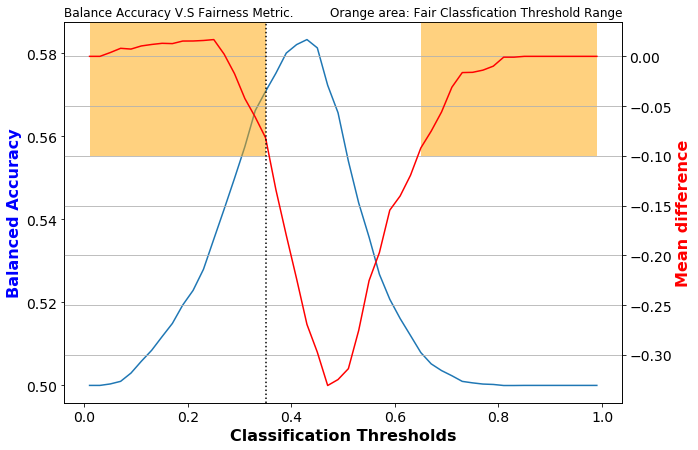

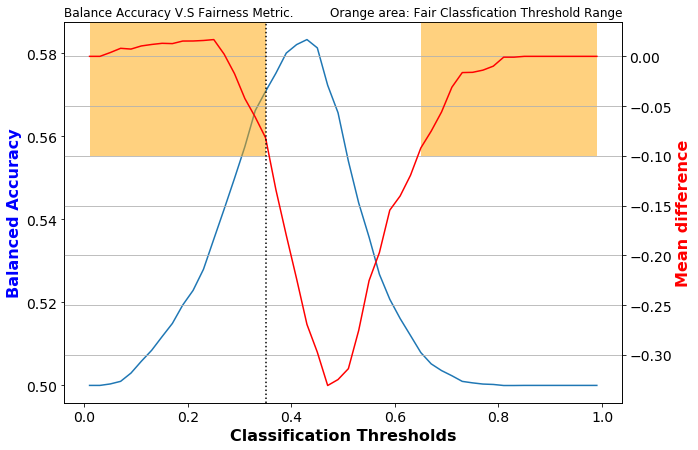

In [6]:
fig = model.plot()
fig

In [7]:
print(model.preproc_name)
print('Best classification threshold: {}'.format(model.best_ultimate_thres))
print('Best balanced accuracy: {}'.format(model.best_acc))

Disparate Impact remover with repair_level = 0.30000000000000004
Best classification threshold: 0.35000000000000003
Best balanced accuracy: 0.5707809214190397


In [12]:
metrics = model.evaluate(test)

[WARNING] [2019-12-08 22:45:55,372:root] Missing Data: 37840 rows removed from StandardDataset.
Data has been transformed into standardized dataframe.
Balanced accuracy = 0.5815
Statistical parity difference = -0.1441
Mean difference = -0.1441
Disparate impact = 0.8173
Average odds difference = -0.1327
Equal opportunity difference = -0.1433
Theil index = 0.1704
Optimal classification threshold (after fairness processing) = 0.3900


,Balanced accuracy,Statistical parity difference,Mean difference,Disparate impact,Average odds difference,Equal opportunity difference,Theil index
0,0.581549,-0.14411,-0.14411,0.817259,-0.132703,-0.143252,0.170445


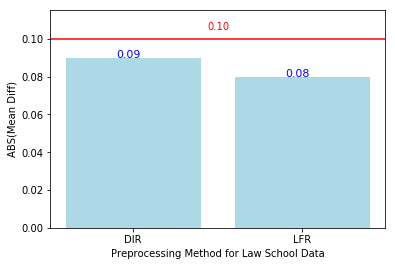

In [127]:
x = np.arange(2)
y = [0.09, 0.08]
fig, ax = plt.subplots()
for i, v in enumerate(y):
    ax.text(i-0.1, 
              y[i], 
              y[i], 
              fontsize=11, 
              color='b')
plt.bar(x,y, color='lightblue')
plt.xlabel('Preprocessing Method for Law School Data')
plt.ylabel('ABS(Mean Diff)')
plt.axhline(y=0.1, color='red', linestyle='-')
plt.annotate('0.10', (0.44,0.105),color = 'red')
plt.xticks(x, ('DIR', 'LFR'))
plt.ylim((0, 0.115))
plt.show()

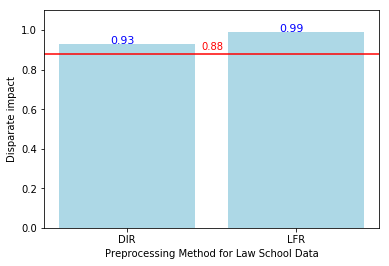

In [126]:
x = np.arange(2)
y = [0.93, 0.99]
fig, ax = plt.subplots()
for i, v in enumerate(y):
    ax.text(i-0.1, 
              y[i], 
              y[i], 
              fontsize=11, 
              color='b')
plt.bar(x,y, color='lightblue')
plt.xlabel('Preprocessing Method for Law School Data')
plt.ylabel('Disparate impact')
plt.axhline(y=0.88, color='red', linestyle='-')
plt.annotate('0.88', (0.44,0.9),color = 'red')
plt.xticks(x, ('DIR', 'LFR'))
plt.ylim((0, 1.1))
plt.show()